In [44]:
from  IPython import display
from matplotlib import pyplot as plt
import numpy as np
import pathlib
import shutil
import tempfile

In [88]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /private/var/folders/l2/zx57tnbn4q3661yb5sqjszwr0000gn/T/pip-req-build-17gmm_1w
  Running command git clone -q https://github.com/tensorflow/docs /private/var/folders/l2/zx57tnbn4q3661yb5sqjszwr0000gn/T/pip-req-build-17gmm_1w
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp37-none-any.whl size=77941 sha256=adfc7621e237d6499e05da610e1987ba4ee69b5f2c3b76385cfbc8045dd86730
  Stored in directory: /private/var/folders/l2/zx57tnbn4q3661yb5sqjszwr0000gn/T/pip-ephem-wheel-cache-8m9348f0/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [91]:
import sys
import os

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K

K._get_available_gpus()

[]

In [92]:
print(tf.__version__)

2.1.0


In [132]:
K.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [133]:
data_entrenamiento="Entrenamiento"
data_validacion="Validación"

In [134]:
#parametro*
epocas=20#iteraciones de la red
altura,longitud=100,100
lote_size=32#tamaño de lote
pasos=1000
pasos_validacion=200
filtrosConv1=32#filtro convolucional
filtrosConv2=64#filtro convolucional 2
sizeFil1=(4,4)#tamaño del filtro de imagen matriz de 3,3
sizeFil2=(3,3)#filtro 2,2
sizePool=(3,3)#tamaño del pooling para la nueva 
clases=120 #numero de clases de frutas (cuantas hay), el numero puede variar
lr=0.00001

In [135]:
#Procesamiento de Imagenes
entrenamiento_datagen=ImageDataGenerator(
rescale=1./255, #Cambiar el rescalado de la imagen de 0 a 255 a 0 a 1 
shear_range=0.3,
zoom_range=0.3,
horizontal_flip=True
)
validacion_datagen=ImageDataGenerator(
rescale=1./255 #Cambiar el rescalado de la imagen de 0 a 255 a 0 a 1 

)
imagen_entrenamiento=entrenamiento_datagen.flow_from_directory(
data_entrenamiento,
target_size=(altura,longitud),
batch_size=lote_size,
class_mode='categorical'
)


Found 61497 images belonging to 120 classes.


In [136]:
#imagenes de validacion
imagen_validacion=validacion_datagen.flow_from_directory(
data_validacion,
target_size=(altura,longitud),
batch_size=lote_size,
class_mode='categorical'
)

Found 20622 images belonging to 120 classes.


In [137]:
#crear la CNN
cnn=Sequential()
cnn.add(Convolution2D(filtrosConv1, sizeFil1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=sizePool))
cnn.add(Dropout(0.2))
#primera capa de convolucion con regla de activacion relu para el filtro 1
cnn.add(Convolution2D(filtrosConv2, sizeFil2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=sizePool))
#segunda capa de convolucion 
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(clases, activation='softmax'))



In [138]:
cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Nadam(lr=lr),
            metrics=['accuracy'])


In [139]:
history=cnn.fit_generator(imagen_entrenamiento,steps_per_epoch=pasos,epochs=epocas,validation_data=imagen_validacion, validation_steps=pasos_validacion)

Epoch 1/20
1000/1000 [==============================] - 419s 419ms/step - loss: 4.7193 - acc: 0.0232 - val_loss: 4.5723 - val_acc: 0.0661
Epoch 2/20
1000/1000 [==============================] - 416s 416ms/step - loss: 4.3484 - acc: 0.0605 - val_loss: 3.9267 - val_acc: 0.1317
Epoch 3/20
1000/1000 [==============================] - 462s 462ms/step - loss: 3.7728 - acc: 0.1193 - val_loss: 3.3127 - val_acc: 0.2914
Epoch 4/20
1000/1000 [==============================] - 434s 434ms/step - loss: 3.3249 - acc: 0.1743 - val_loss: 2.8505 - val_acc: 0.3464
Epoch 5/20
1000/1000 [==============================] - 434s 434ms/step - loss: 2.9687 - acc: 0.2309 - val_loss: 2.5152 - val_acc: 0.4041
Epoch 6/20
1000/1000 [==============================] - 485s 485ms/step - loss: 2.7113 - acc: 0.2768 - val_loss: 2.2314 - val_acc: 0.4663
Epoch 7/20
1000/1000 [==============================] - 450s 450ms/step - loss: 2.4917 - acc: 0.3169 - val_loss: 2.0128 - val_acc: 0.5227
Epoch 8/20
1000/1000 [============

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


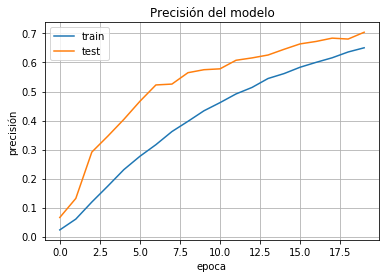

In [151]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precisión del modelo')
plt.ylabel("precisión")
plt.xlabel("epoca")
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("precisión.jpg")
plt.show()

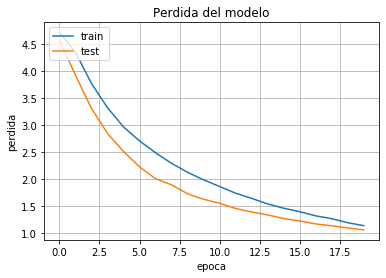

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('perdida')
plt.xlabel('epoca')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("perdida.jpg")
plt.show()

In [129]:


target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modelo.h5')
cnn.save_weights('./modelo/pesos.h5')